<a href="https://colab.research.google.com/github/haidoro/Least-squares/blob/master/Least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最小二乗法について

In [0]:
import pandas as pd
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

## サンプルデータ
4日間で植物がタネから成長した記録

次のデータをサンプルとして使用。
* 説明変数として日にちのデータ（date）x軸
* 目的変数としてに値のデータ（value)　y軸

In [0]:
data = pd.DataFrame({'date':[1,2,3,4],'value':[0.8,1.9,2.8,4.1]})
data

,date,value
0,1,0.8
1,2,1.9
2,3,2.8
3,4,4.1


### データを散布図でプロット

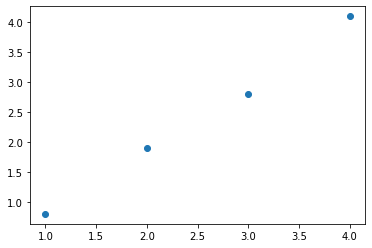

In [0]:
plt.plot(data['date'],data['value'],'o')

## 傾きから回帰直線を描く
仮説で傾きを決める

傾きは2日目から3日目の間に伸びた長さ0.9を1日の1で割った値

In [0]:
a = (data['value'][2] - data['value'][1]) / (data['date'][2] - data['date'][1])
a

0.8999999999999999

切片は0として回帰係数（傾き）aは次のようになる。
y = 0.9x

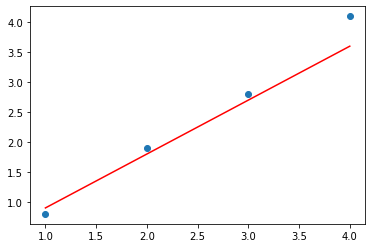

In [0]:
plt.plot(data['date'],data['value'],'o')
plt.plot(data['date'],data['date'] * 0.9, c='r')

### 誤差を求める

In [0]:
variation = data['value'] - data['date'] * 0.9
variation

0   -0.1
1    0.1
2    0.1
3    0.5
dtype: float64

誤差の合計

In [0]:
print(variation**2)
print(sum(variation**2))

0    0.01
1    0.01
2    0.01
3    0.25
dtype: float64
0.27999999999999947


### 最小二乗法の公式
\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

ちなみに0の2乗は1

### 実際のデータの値を最小二乗法にあてはめる
$$
J=(a−0.8)^2+(2a−1.9)^2+(3a−2.8)^2+(4a−4.1)^2 = 30a^2 - 58.8a + 28.9
$$

## 最小誤差を求めるには微分を使う
$J$ を$a$の関数として偏微分したものを0とすると次のようになる。
$$
f(x) = 30a^2 - 58.8a + 28.9\\
f'(x)=60a -58.8 \\
f'(x)=0\\
a= 0.98
$$

### 最小二乗法の公式をグラフ化
x軸に並行な切片が引かれるところが誤差が最小になる。  
最小二乗法の公式をグラフ化すると必ず下のような曲線を描く（2次方程式だから）  
曲線のグラフになるものは微分が使える。

x軸が0.9近辺だということがグラフからもわかる。

切片を考慮すると偏微分を使う必要がある。
$$
\frac{\partial f}{\partial x}(ax^2+axy+y^2)=2ax+ay
$$

$\partial$はパーシャルやラウンドディーなどと読みます。


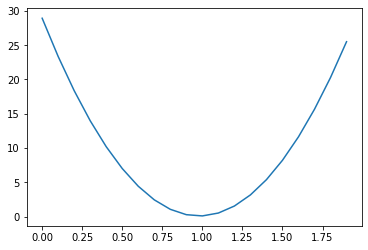

In [0]:
a = np.arange(0,2,0.1)
plt.plot(a,(30*𝑎**2) - (58.8*𝑎) + 28.9,'-')

### 算出した傾きを使ってみる

In [0]:
variation = data['value'] - data['date'] * 0.98
variation

0   -0.18
1   -0.06
2   -0.14
3    0.18
dtype: float64

誤差の合計

In [0]:
sum(variation**2)

0.08799999999999991

#### グラフ化

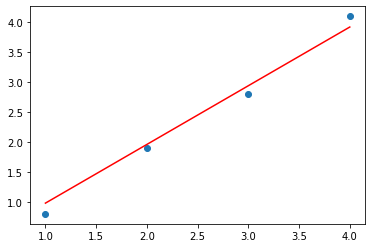

In [0]:
plt.plot(data['date'],data['value'],'o')
plt.plot(data['date'],data['date'] * 0.98, c='r')

## Scikit-learnで正確な傾きと切片を算出

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data[['date']].values,data['value'].values)
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)

回帰係数: [1.08]
切片: -0.30000000000000027


グラフ化

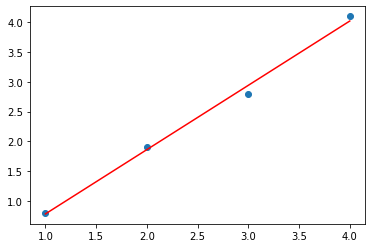

In [0]:
plt.plot(data['date'],data['value'],'o')
plt.plot(data[['date']], reg.predict(data[['date']]),'r-')